# Intro To Time Series Analysis - Part 2

### Goal

- Define Time Series
- Examine Time Series, Look for trends, seasonality
- Use ACF to examine correlations between variables
- Perform simple sismulation of time series
- Introduce the package **astsa**

## What is a time series?

A collection of obervations through time. We can think of a time series as a set of data point collected at different points in time.

**astsa** is a time series package in R. It has several datasets. 

In [1]:
#import package astsa
require(astsa)
#import repr to resize plot
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

Loading required package: astsa


## Visualize Time Series

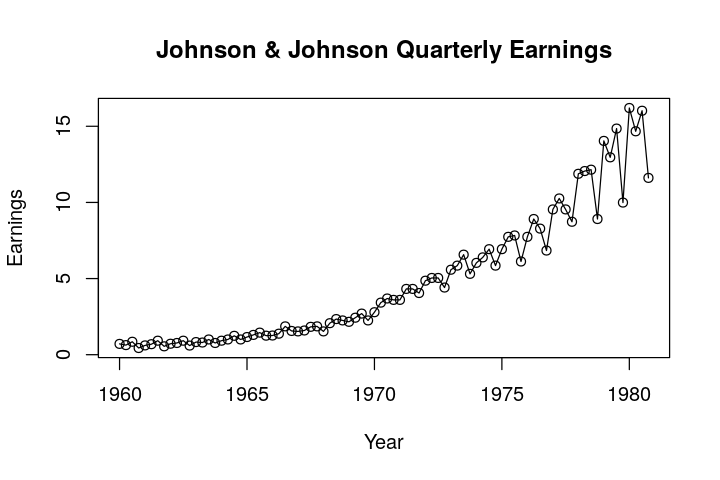

In [2]:
#help(astsa)
plot(jj, type='o', main='Johnson & Johnson Quarterly Earnings', xlab='Year', ylab='Earnings')

- We have some sort of trend
- We have seasonality
- Seasonal effect changes with time   

**This dataset violate stationarity conditions**

## Stationarity

#### Stationarity     
Means we donot want any systematic change in the data. If the time series is not stationary, we need some tranformations to make it stationary

- constant mean
- constant variance

## Covariance

Measures the linear dependence between two random variables X and Y, 
$$Cov(X,Y) = E[(X-\bar{X})(Y-\bar{Y})] = Cov(Y,X)$$  
**A Stochastic process** is a collection of random variables. **We can now think of a time series as a realization of stochastic processes**

## Autocovariance and Autocovariance Function

It is the Covariance between two random variables at different time steps.   

$$\gamma(X_t,X_s) = E[(X_t-\bar{X_t})(X_s-\bar{X_s})]$$ 

$$\gamma(X_t,X_t) = E[(X_t-\bar{X_t})^2] = Var(X_t) = \sigma_t^2$$  

The **autocovariance function**
$$\gamma(k) = \gamma(t, t+k) = c_k$$   
**Note:** $\gamma(k)$ only depends on the difference in time. $c_k$ are the autocovariance coefficients. So we can estimate the $c_k$ from our data   

$$c_k = \frac{\sum_{t=1}^{N-k}{(x_t-\bar{x})(x_{t+k}-\bar{x})}}{N}$$

with

$$\bar{x} = \frac{\sum_{t=1}^{N}x_t}{N}$$

In R we can get the **autocovariance coefficient** using
```R
acf(time_series_data, type='covariance')
```

### Example: Calculating autocovariance coefficients for simulate random process

In [3]:
random_process=ts(rnorm(100))
print(random_process)

Time Series:
Start = 1 
End = 100 
Frequency = 1 
  [1] -2.403190716  0.347461779 -1.213316184  0.101891688  0.109425371
  [6] -0.995719075  1.183249556 -0.465204458  0.451378891 -0.984069653
 [11] -1.551361602 -0.027393355 -1.267657554  0.668690188 -0.970487690
 [16] -0.904606402  0.550601714 -1.488735102 -0.541850165  0.199607284
 [21]  0.548148014 -0.200681699  0.446857172  0.554462864  0.195931664
 [26] -0.552860506  1.519940235  0.049643986  0.847281477  0.082258373
 [31] -0.723660307  1.878865039  1.064146840  0.538901670 -1.081622547
 [36] -1.256944734  0.122667783 -0.544192843 -0.778171819  1.353886084
 [41]  1.434529167  0.801509356  0.647073091  1.113413197  1.408534163
 [46] -0.656427204  0.054592248 -0.890385227 -0.215521841  0.469806042
 [51]  0.239701407  0.167367742 -1.155891131 -0.420756791  1.375856364
 [56]  0.530706843 -1.154224437 -0.495333693 -0.191623896  1.242470668
 [61]  0.926058789 -1.936405509 -0.137190274  0.352346169  0.797342617
 [66]  0.579707031 -0.61246


Autocovariances of series ‘random_process’, by lag

       0        1        2        3        4        5        6        7 
 0.99305  0.15139 -0.03661 -0.00820 -0.07211  0.14562 -0.07201 -0.04755 
       8        9       10       11       12       13       14       15 
-0.00755 -0.04485 -0.00318 -0.03150  0.05727  0.03352 -0.02425  0.06489 
      16       17       18       19       20 
-0.06068 -0.00355  0.09885 -0.03312 -0.04529 

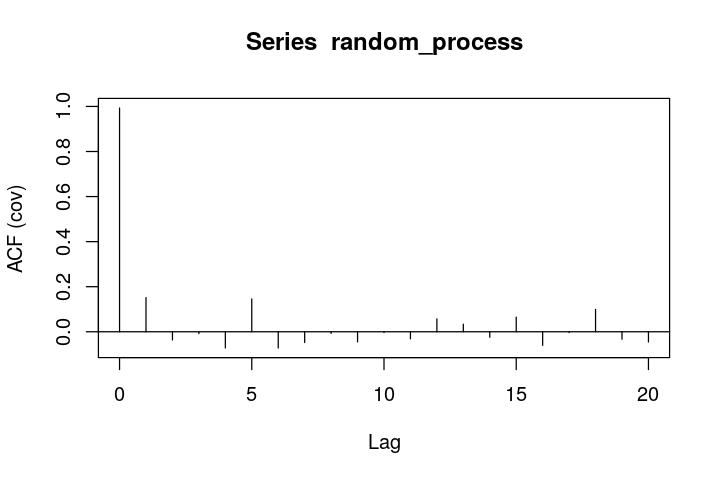

In [4]:
#wrap code around parenthesis to print output
(acf(random_process, type='covariance'))

The above plot show **autocorrelation coefficients** at different lags, but what are these coefficients

## Autocorrelation coefficients

defined by

$$-1 \leq \rho_k = \frac{\gamma_k}{\gamma_0} \leq 1$$

So we can estimate the **autocorrelation coefficients at lag k** as

$$r_k = \frac{c_k}{c_0}$$ 

**Note:** In the ACF plot, the first lag is always 1 and thi is because

$$r_0 = \frac{c_0}{c_0} = 1$$ 
Note also that in our ACF plot, all other lags have very small autocorrelation coefficients. This makes sense because the data is random, so we donot expect any huge correlations

# Modeling Time Series

### Random Walk

- What i a Random Walk
- Simulate Random Walk in R
- Optain the correlagram (ACF curve) of a Random Walk
- Use Difference Operator

The **Random Walk Model** is 

$$X_t = X_{t-1} + Z_t$$   

- $X_t$ is observation at time t
- $Z_t$ is some **random noise** such that $Z_t$ ~ $N(\mu, \sigma^2)$  

We can also write 
$$X_t = X_0 + Z_1 + Z_2 + ... + Z_t = X_0 + \sum_i{Z_i}$$   

If we let $X_0 = 0$, then a **random walk** is just an accumulation of random noise  

The **Mean** is

$$E[X_t] = E[\sum_i{Z_i}] = \sum_{i=1}^t{E[Z_i]} = \mu t$$

And the **Variance**

$$Var[X_t] = Var[\sum_i{Z_i}] = \sum_{i=1}^t{Var[Z_i]} = \sigma^2 t$$

---
**The mean and the variance depend on t, hence a random walk is not a stationary process**

In [5]:
x=NULL
x[1] = 0
for (i in 2:1000){
    x[i] = x[i-1] + rnorm(1)
}
#use ts to transform data to time series
random_walk=ts(x)

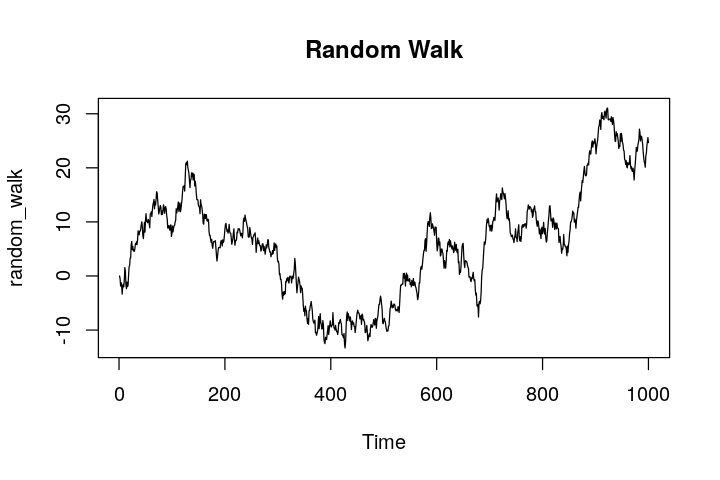

In [6]:
plot(random_walk, main='Random Walk')

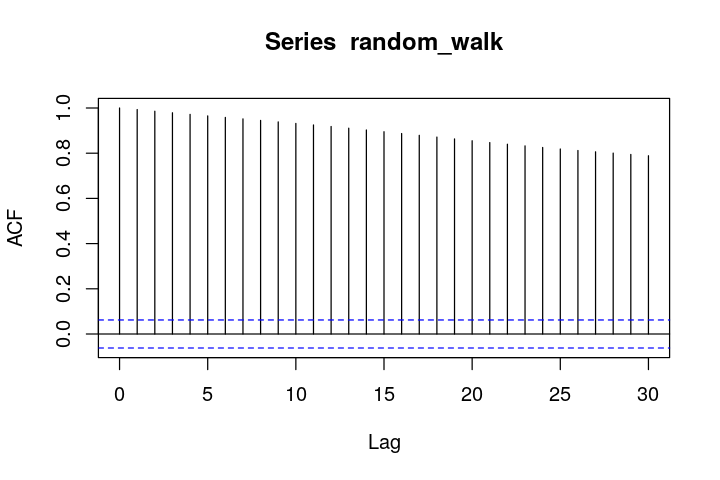

In [7]:
#Let' look at the autocorrelation coefficients
acf(random_walk)

The ACF plot shows significant correlations up to lag 30. This is because the random walk as we have shown is not stationary. But note that 

$$X_t = X_{t-1} + Z_t $$  
or 
$$X_t-X_{t-1} = \Delta X_t = Z_t $$   
This means if we take the first difference, we should get a random noise, which i stationary

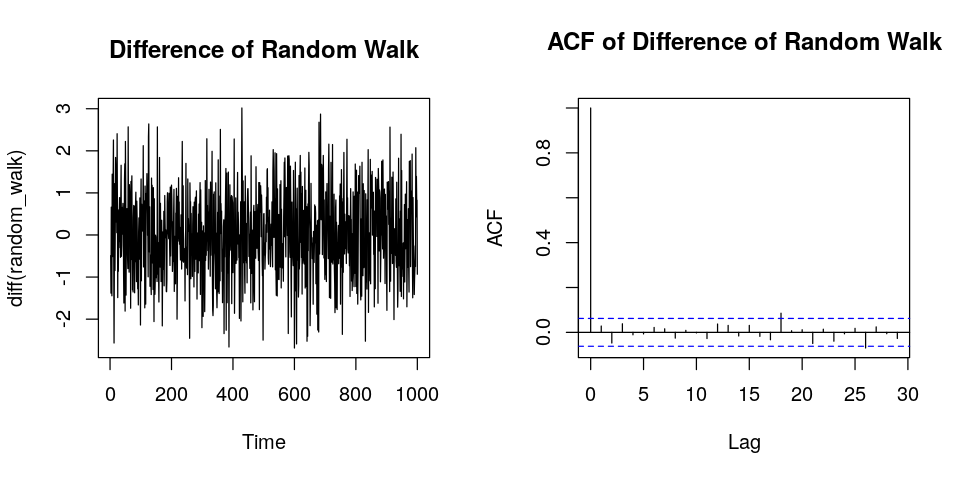

In [8]:
options(repr.plot.width=8, repr.plot.height=4)
attach(mtcars)
par(mfrow=c(1,2))
plot(diff(random_walk), main='Difference of Random Walk')
acf(diff(random_walk), main='ACF of Difference of Random Walk')

### Moving Average MA(q)

A moving average process is essentially a linear combination of random noise $Z_i$ are **i.i.d** & $Z_i$ ~ $N(\mu, \sigma^2)$

$$X_t = Z_t + \theta_1 Z_{t-1} + ... + \theta_{t-q-1} + \theta_2 Z_{t-q}$$

The model for q = 2 is 

$$X_t = Z_t + \theta_1 Z_{t-1} + \theta_2 Z_{t-2}$$

$$\gamma_0 = \sigma^2 \sum_{i=1}^q{\theta_i^2}$$

##### Simulation of MA(2) process

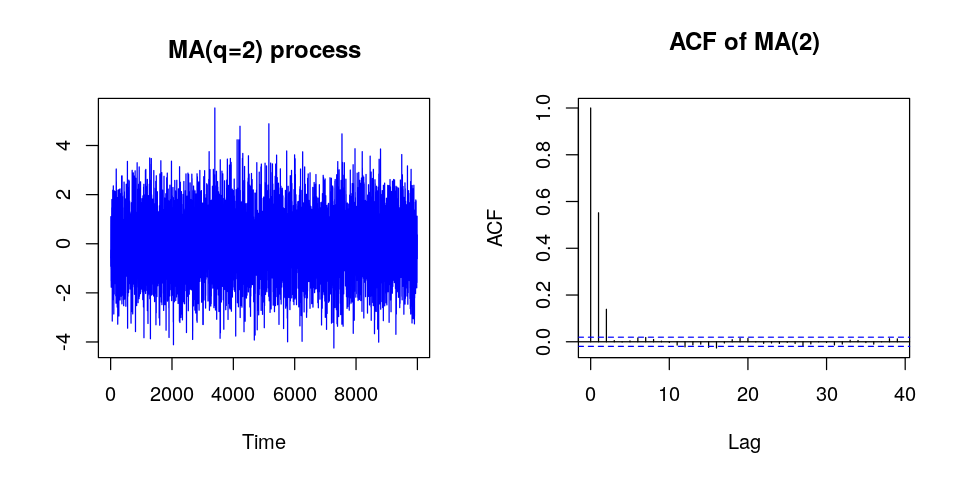

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
# Generate noise
noise=rnorm(10000)

# Introduce a variable
ma_2=NULL

# Loop for generating MA(2) process

for(i in 3:10000){
    ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
}

# Shift data to left by 2 units
moving_average_process=ma_2[3:10000]

# Put time series structure on a vanilla data
moving_average_process=ts(moving_average_process)

# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(1,2))

# plot the process and plot its ACF
plot(moving_average_process, main='MA(q=2) process', ylab=' ', col='blue')
acf(moving_average_process, main='ACF of MA(2)')


**Note:** For MA(q) process, the ACF has to cutoff at lag q. For intance, the above ACF cuts off at lag 2. i.e. all the lags are zero after lag 2. Moving Average processes are stationary

## Auto Regressive Process AR(p) 

AR processes are similar to MA but we use past obervation in a linear combination, rather than just random noise.

$$X_t = Z_t + \phi_1 X_{t-1} + \phi_2 X_{t-2} + ... + \phi_{t-p-1} + \phi_{t-p} X_{t-p}$$

The model for p = 2 is 

$$X_t = Z_t + \phi_1 X_{t-1} + \phi_2 X_{t-2}$$

$Z_i$ ~ $N(\mu, \sigma^2)$

#### Simulation of AR(2) process

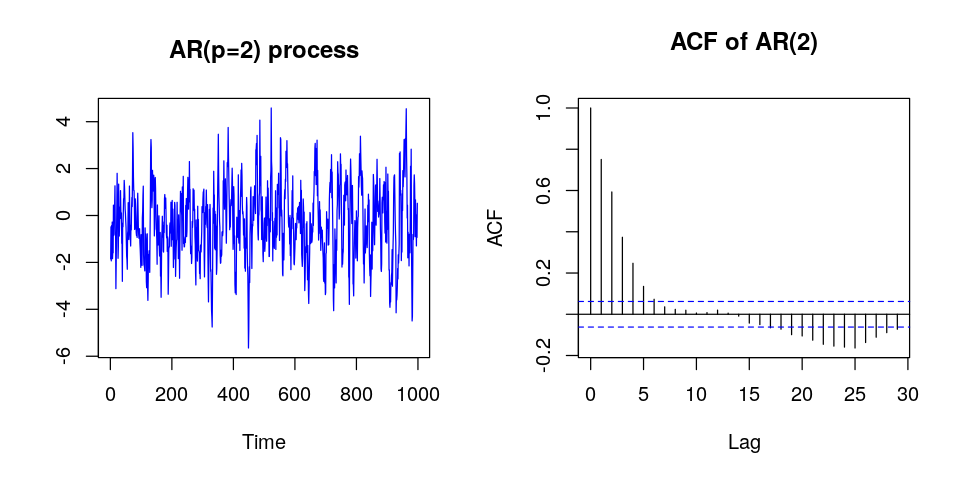

In [10]:
options(repr.plot.width=8, repr.plot.height=4)
# Generate noise
set.seed(2019)
N = 1000
Z = rnorm(N, 0, 1)
X = NULL
phi1 = 0.7; phi2 = -0.2;

# Initialize X
X[1] = Z[1]
X[2] = Z[2]
# Loop for generating AR(2) process
for(t in 3:N){
    X[t] = Z[t] + phi1*X[t-1] - phi2*Z[t-2]
}

# Shift data to left by 2 units
X = X[3:N]

# set up time series
x.ts = ts(X)

# Partition output graphics as a multi frame of 2 rows and 1 column
par(mfrow=c(1,2))

# plot the process and plot its ACF
plot(x.ts, main='AR(p=2) process', ylab=' ', col='blue')
acf(x.ts, main='ACF of AR(2)')

The ACF has no cut-off in this case